In [1]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


1/1 [==============================] - 0s 52ms/step


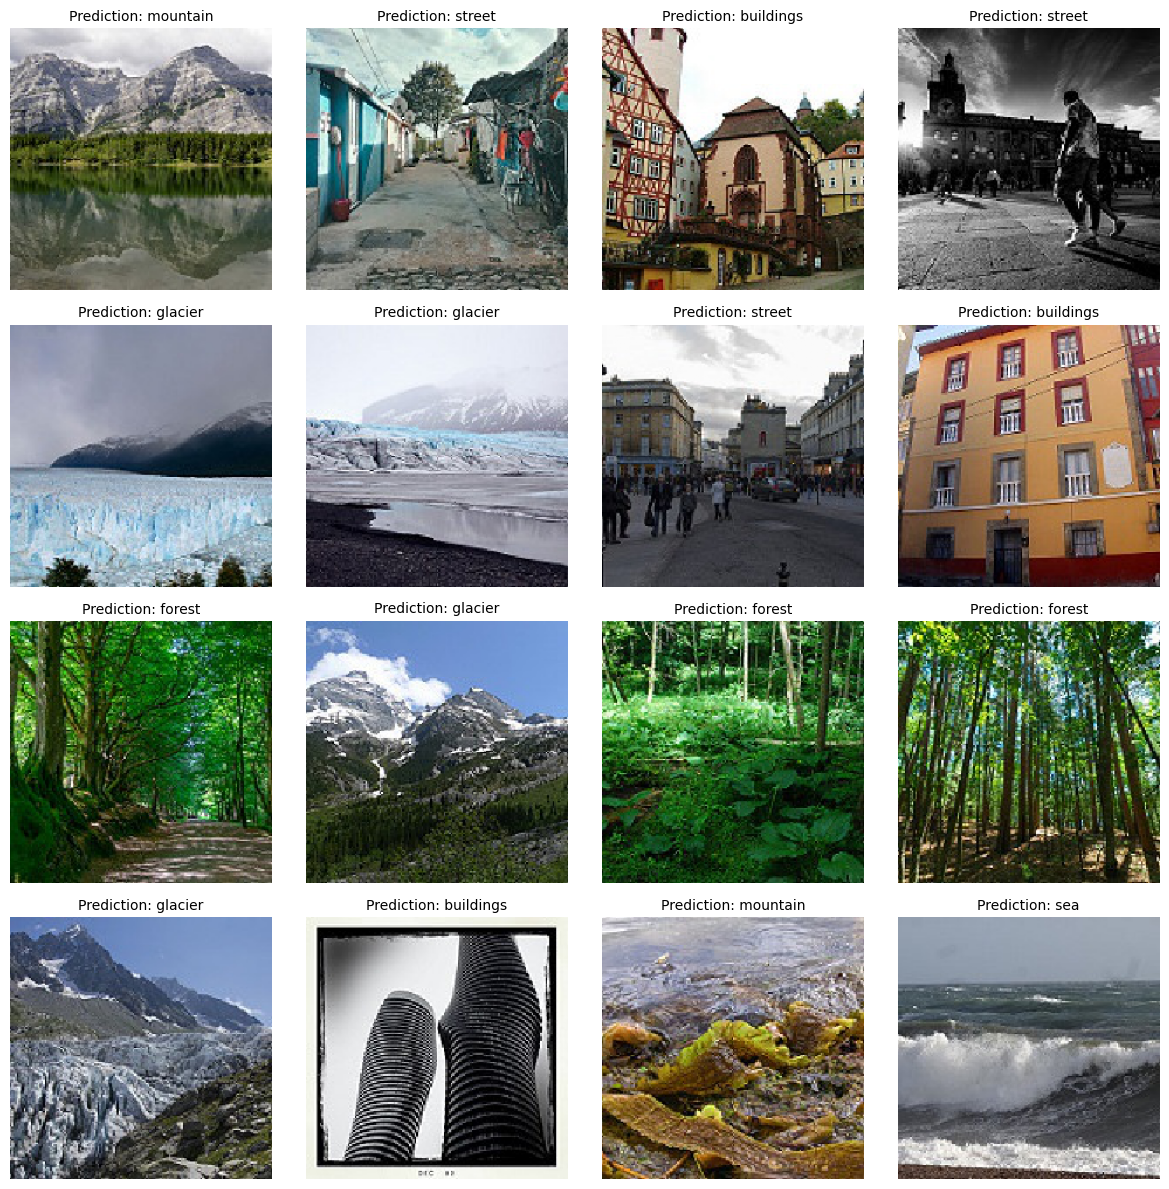

In [2]:

# Assuming you have class_names defined somewhere in your code
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']  # Define your class names here

# Load your model
model = load_model('model.h5')

pred_folder = 'intel/seg_pred/seg_pred'
pred_files = [os.path.join(pred_folder, f) for f in os.listdir(pred_folder)]
random_indices = np.random.randint(0, len(pred_files), size=16)

# create plot 
fig, ax = plt.subplots(4, 4, figsize=(12, 12))

for i, ax in enumerate(ax.flat):
    random_n = random_indices[i]
    img_path = pred_files[random_n]
    
    # loading image and preprocessing
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, axis=0)
    
    # predict using the loaded model
    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)[0]  
    
    # create title of the image
    pred_label = class_names[pred]
        
    ax.imshow(img[0])
    ax.set_title(f"Prediction: {pred_label}", fontsize=10)
    ax.axis("off")
    
plt.tight_layout()
plt.show()
